<a href="https://colab.research.google.com/github/saintroger/MSDS/blob/main/SaintRoger_Bountsebeeboueme_hwk1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import collections
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. The sample space of this experiment 1 and 0

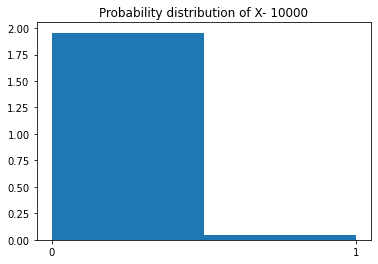

In [7]:
#b) Experiment 
values = []
num_trials = 10000
values_count = []

def create_0_1(values):
  i=0
  count = 0
  for x in values:
    if x == values[i]:
      count = count+1
  i=i+1
  if count>=2:
     return 1
  else:
     return 0 


for i in range(num_trials):
  values = (np.random.randint(low=1, high=366, size=10))#randomly pick 10 people
  values_count.append(create_0_1(values))

plt.hist(values_count ,bins=2, density=True)
plt.xticks([0, 1])
plt.title('Probability distribution of X- with 10 people ')
plt.show()


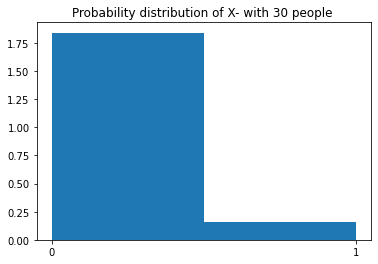

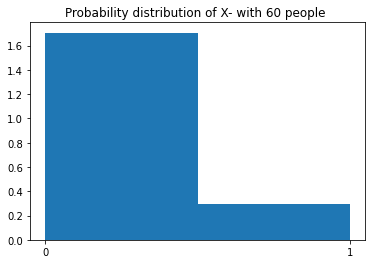

In [8]:
#c) Let'S try picking 30 people  and 60
values_count1 = []
values_count2 = []


for i in range(num_trials):
  values1 = (np.random.randint(low=1, high=366, size=30))#randomly pick 30 people
  values_count1.append(create_0_1(values1))

plt.hist(values_count1 ,bins=2, density=True)
plt.xticks([0, 1])
plt.title('Probability distribution of X- with 30 people ')

plt.show()


for i in range(num_trials):
  values2 = (np.random.randint(low=1, high=366, size=60))#randomly pick 60 people
  values_count2.append(create_0_1(values2))

plt.hist(values_count2 ,bins=2, density=True)
plt.xticks([0, 1])
plt.title('Probability distribution of X- with 60 people ')

plt.show()


When you pick more people the number probability 2 people or more born the same day increase.



2.   Setting up hypothesis test

> H0: Mean weight different from population mean


> H1: Mean weight equal population mean





In [9]:
#Question 2b
df = pd.read_csv('/content/drive/MyDrive/data/athlete_events.csv')
country_of_choice = 'China'
alpha=0.01

#to compute the p value 

#Step1: determine sample mean 
df_sample = df[df['Team'] == country_of_choice].sample(n=100)
sample_mean = df_sample['Weight'].mean()
print('Sample mean',sample_mean)

#step2: Estimate standard deviation
std_error = scipy.stats.sem(df_sample['Weight'], nan_policy='omit')
print('Standard deviation',std_error)

#step3: Computing population mean 
pop_mean = df['Weight'].mean()
print('Population mean', pop_mean)

#Step4: Compute z_value
z = (sample_mean - pop_mean) / (std_error)
print('z_value', z)

#Stpe5: compute p_value
def p_of_z(z):
    return scipy.stats.norm(0, 1).cdf(z)
p = 2*p_of_z(-z)
print('p_value:',p)

#step5: conclude
if p>alpha:
  print('Since p > alpha we fail to reject the null hypothesis')
else:
  print('we reject the null hypothesis')


Sample mean 65.28421052631579
Standard deviation 1.3365951928294904
Population mean 70.70239290053351
z_value -4.053719782388084
p_value: 1.9999495904049605
Since p > alpha we fail to reject the null hypothesis


3. TV and sales look linearly correlated

In [10]:
#3) We have a pair that look correlated 
df = pd.read_csv('/content/drive/MyDrive/data/Advertising.csv')
model = ols(formula = 'TV ~ sales', data=df)
res = model.fit()
print('R_squared', res.rsquared)
res.summary()


R_squared 0.6118750508500711


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TV   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        23:30:09   Log-Likelihood:                -1079.2
No. Observations:                 200   AIC:                             2162.
Df Residuals:                     198   BIC:                             2169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.4502     10.897     -3.070      0.002     -54.939     -11.961
sales         12.8717      0.729     17.668      0.000      11.435      14.308
==============================================================================
Omnibus:                       21.952   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.224
Skew:                           0.882   Prob(JB):                     2.02e-06
Kurtosis:                       3.193   Cond. No.                         43.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

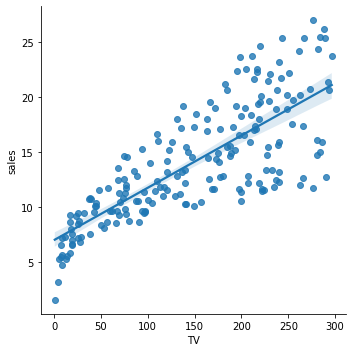

In [27]:
#The shaded region is the 95% 
import seaborn as sns
sns.lmplot(x='TV',y='sales',data=df)

3. As the TV investment increased, sales increase as well. [link text](https://)

4. a) They are linearly correlated 

In [39]:
# Question 5
df = sns.load_dataset('penguins')

model = ols(formula = 'bill_length_mm ~ body_mass_g', data=df)
res = model.fit()
print('R_squared with body mass as the exogenous variable', res.rsquared)


model = ols(formula = 'bill_length_mm ~ flipper_length_mm', data=df)
res = model.fit()
print('R_squared with flipper length as the exogenous variable', res.rsquared)

#best fit line 
#sns.lmplot(x='TV',y='sales',data=df)

R_squared with body mass as the exogenous variable 0.3541557031421869
R_squared with flipper length as the exogenous variable 0.43057395194378


Flipper length seems to predict bill length better than the body mass does.

In [44]:
#let create a separate model for each species

df.species.unique()
#array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

#Adelie
df_adelie = df[df['species']=='Adelie']
model = ols(formula = 'bill_length_mm ~ flipper_length_mm', data=df_adelie)
res = model.fit()
print('R_squared with flipper length as the exogenous variable', res.rsquared)

R_squared with flipper length as the exogenous variable 0.10613568063524415


In [45]:
#Adelie
df_Chinstrap = df[df['species']=='Chinstrap']
model = ols(formula = 'bill_length_mm ~ flipper_length_mm', data=df_Chinstrap)
res = model.fit()
print('R_squared with flipper length as the exogenous variable', res.rsquared)

R_squared with flipper length as the exogenous variable 0.2224134255850081


In [46]:
df_Gentoo = df[df['species']=='Gentoo']
model = ols(formula = 'bill_length_mm ~ flipper_length_mm', data=df_Gentoo)
res = model.fit()
print('R_squared with flipper length as the exogenous variable', res.rsquared)

R_squared with flipper length as the exogenous variable 0.4371353522056489


The overall precision of our model does not necesseraly increased if we create a separated model for each species. However the model for Gentoo species seems to be slight more accurate with rSquared of 0.437 compared to the overall prediction with rsquared of 0.43

Why might models get better if we create a separate linear model for each category?
Can a model get “worse” if we do this? 